<a href="https://colab.research.google.com/github/cristobalvch/DataScience-For-Business/blob/main/Operations-Image_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TAREA # 1: COMPRENDER EL PROBLEMA Y EL CASO PRÁCTICO


<table>
  <tr><td>
    <img src="https://drive.google.com/uc?id=15eGnAbma5Q_j9CZZKi46Gh3-EpgSWYOV"
         alt="Fashion MNIST sprite"  width="1000">
  </td></tr>
  <tr><td align="center">
    <b>Figura 1. Clasificación de Enfermedades utilizando Deep Learning 
  </td></tr>
</table>


![alt text](https://drive.google.com/uc?id=1t-Q7JllEobw8YwV3wcTuMA12J9JArfwp)

![alt text](https://drive.google.com/uc?id=1pNAshUhBxksQcrTfulYmUKXUPOmWbXb0)

# TAREA # 2: IMPORTAR LIBRERÍAS Y CONJUNTO DE DATOS

In [1]:
import os
import cv2
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import Input, Add, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D, AveragePooling2D, MaxPooling2D, Dropout
from tensorflow.keras.models import Model, load_model
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


In [2]:
# Necesitarás montar tu disco usando los siguientes comandos:
# Para obtener más información sobre el montaje, consulta esto: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
# Especificar el directorio del conjunto de entrenamiento
path = '/content/drive/My Drive/Colab Notebooks/Dataset'


In [4]:
# Listar las carpetas de dicho directorio
os.listdir(path)

['3', '0', '1', '2']

In [5]:
# Utilizar el generador de imágenes para generar datos de imágenes de tensores y normalizarlos
# Utilizar el 20% de los datos para la validación cruzada posterior
image_generator = ImageDataGenerator(rescale=1./255,validation_split=0.2)

In [6]:
# Genere lotes de 40 imágenes
# El número total de imágenes es 133 * 4 = 532 imágenes
# El entrenamiento usará es 428 (80%) y la validación usará 104 (20%)
# Realizar muestreo aleatoria y cambio del tamaño en las imágenes
train_generator = image_generator.flow_from_directory(batch_size=40,directory=path,shuffle=True,
                                                      target_size=(256,256),class_mode='categorical',subset='training')

Found 428 images belonging to 4 classes.


In [7]:
validate_generator = image_generator.flow_from_directory(batch_size=40,directory=path,shuffle=True,
                                                      target_size=(256,256),class_mode='categorical',subset='validation')

Found 104 images belonging to 4 classes.


In [8]:
# Generar un lote de 40 imágenes y etiquetas
train_images,train_labels = next(train_generator)

In [9]:
train_images.shape
#40 imagenes
#256 width pixels
#2356 height pixels
#3 entradas de colores

(40, 256, 256, 3)

In [15]:
train_labels[0:5]

array([[0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.]], dtype=float32)

In [11]:
# Traductor de cada Etiqueta
label_names = {0:'Covid-19',1:'Normal',2:'Pneumonia Virica',3:'Pneumonia Bacteriana'}

# TAREA #3: VISUALIZACIÓN DEL DATASET

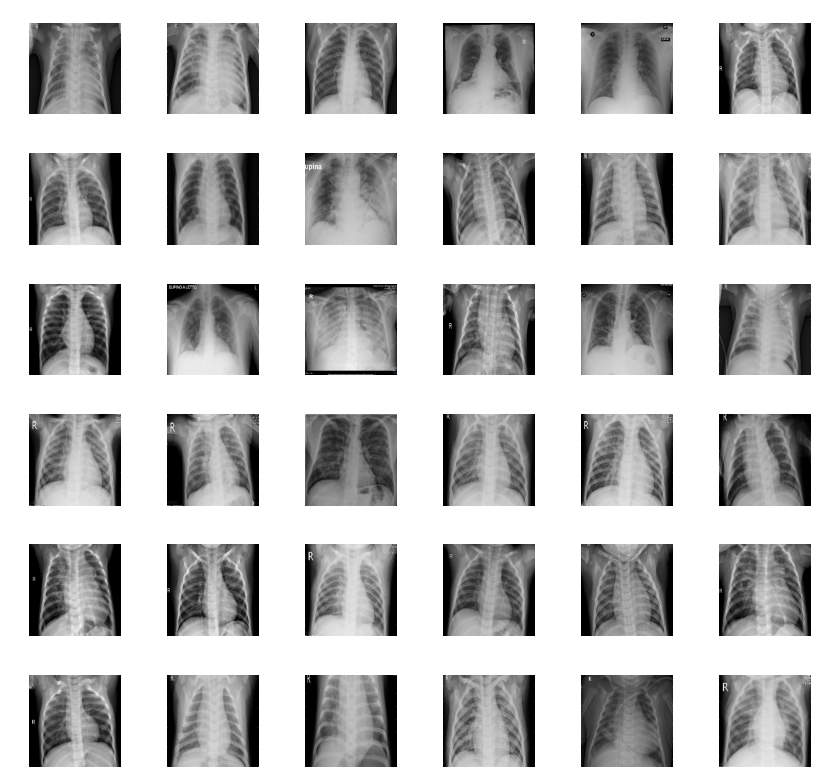

In [17]:
# Crea una matriz de 36 imágenes junto con sus etiquetas correspondientes
fig, axs = plt.subplots(6,6,figsize=(14,14))
axs = axs.flatten()

for i in range(36):
  axs[i].imshow(train_images[i])
  axs[i].set_title(label_names[np.argmax(train_labels[i])],color='white')
  axs[i].axis('off')

plt.subplots_adjust(wspace=0.5)

# TAREA #4: ENTENDER LA TEORÍA Y LA INTUICIÓN DETRAS DE LAS REDES NEURONALES PROFUNDAS

![alt text](https://drive.google.com/uc?id=1e4bFs8Fh2Bp4ueRi9Q9SASRWZ2SwShJX)

![alt text](https://drive.google.com/uc?id=1zsKnK9bQVjUt5Z38gEK3qnIoafRR6i1c)

![alt text](https://drive.google.com/uc?id=1mL13x1d9uAItMFwtV_9r-fKqQp8DjfQo)

![alt text](https://drive.google.com/uc?id=1-se5iR8RsZ4Bold3MK60hDpL0qky7H97)

# TEORÍA #5: ENTENDER LA TEORÍA Y LA INTUICIÓN DETRÁS DEL APRENDIZAJE POR TRANSFERENCIA

![alt text](https://drive.google.com/uc?id=1ypOE6WINmjunchutKTSUbx4FCzuYUyqC)

![alt text](https://drive.google.com/uc?id=16Rhq_7flyuy5oS1vEJ7p3l1Y8irU7Zwg)

![alt text](https://drive.google.com/uc?id=1hCdV7lmgADpw8jV7nf0KO3mMzIMuMZDM)

![alt text](https://drive.google.com/uc?id=1gHDvwWJBBD5d94HPpSydQLb6pjTfknrK)

# TAREA #6: IMPORTAR EL MODELO CON PESOS PRE ENTRENADOS

In [18]:
basemodel = ResNet50(weights='imagenet',include_top=False,input_tensor=Input(shape = (256,256,3)))

94773248/94765736 [==============================] - 1s 0us/step


In [19]:
basemodel.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 128, 128, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [20]:
# Congelar el modelo hasta las últimas etapas - 4 y llevar a cabo un re entrenamiento -5 
for layer in basemodel.layers[:-10]:
  layer.trainable = False

# TAREA #7: CONSTRUIR Y ENTRENAR UN MODELO DE DEEP LEARNING

In [57]:
headmodel = basemodel.output
#promediar los resultados del ouput y reducir con pooling
headmodel = AveragePooling2D(pool_size=(4,4))(headmodel)
#Aplanar vector matriz 
headmodel = Flatten(name = 'flatten')(headmodel)
#reducir a valores positivos con activacion relu
headmodel = Dense(256, activation = 'relu')(headmodel)
#Capa para evitar overfitting
headmodel = Dropout(0.3)(headmodel)
#reducir a valores positivos con activacion relu
headmodel = Dense(128, activation = 'relu')(headmodel)
#Capa para evitar overfitting
headmodel = Dropout(0.2)(headmodel)
#reducir a valores positivos con activacion relu
headmodel = Dense(64, activation = 'relu')(headmodel)
#Capa para evitar overfitting
headmodel = Dropout(0.1)(headmodel)

#Capa de salida
headmodel = Dense(4, activation = 'softmax')(headmodel)

model = Model(inputs = basemodel.input, outputs = headmodel)

In [58]:
#categorical binary cuando hay dos categorias
#categorical crossentropy cuando hay mas de dos
#RMSprop utiliza proporcion de categorias para sacar maximo valor de categorizacion = maximizar ratio de aciertos de la enfermeda 
model.compile(loss='categorical_crossentropy',optimizer=optimizers.RMSprop(lr=1e-4,decay=1e-6),metrics=['accuracy'])

In [59]:
# Usar la parada temprana (early stopping) para salir del entrenamiento si la pérdida en la validación no disminuye incluso después de ciertas épocas (paciencia)
#reducir mas overfitting con early stop.
earlystopping = EarlyStopping(monitor = 'val_loss',mode = 'min',verbose = 1,patience = 20)


# Almacenar el mejor modelo con la menor pérdida en la validación
checkpointer = ModelCheckpoint(filepath='weights.hdf5',verbose=1,save_best_only=True)

In [60]:
train_generator = image_generator.flow_from_directory(batch_size=4, directory = path, shuffle = True, target_size=(256, 256), class_mode = "categorical", subset = "training")
val_generator = image_generator.flow_from_directory(batch_size=4, directory = path, shuffle = True, target_size=(256, 256), class_mode = "categorical", subset = "validation")

Found 428 images belonging to 4 classes.
Found 104 images belonging to 4 classes.


In [61]:
history = model.fit_generator(train_generator, steps_per_epoch=train_generator.n//4, epochs = 25, 
                              validation_data = val_generator, validation_steps = val_generator.n // 4,
                              callbacks = [checkpointer, earlystopping])

Epoch 1/25
106/107 [============================>.] - ETA: 0s - loss: 0.8273 - accuracy: 0.6557
Epoch 00001: val_loss improved from inf to 0.68809, saving model to weights.hdf5
107/107 [==============================] - 11s 104ms/step - loss: 0.8206 - accuracy: 0.6589 - val_loss: 0.6881 - val_accuracy: 0.7308
Epoch 2/25
107/107 [==============================] - ETA: 0s - loss: 0.4994 - accuracy: 0.8294
Epoch 00002: val_loss did not improve from 0.68809
107/107 [==============================] - 10s 91ms/step - loss: 0.4994 - accuracy: 0.8294 - val_loss: 0.9881 - val_accuracy: 0.7308
Epoch 3/25
107/107 [==============================] - ETA: 0s - loss: 0.4659 - accuracy: 0.8364
Epoch 00003: val_loss did not improve from 0.68809
107/107 [==============================] - 10s 91ms/step - loss: 0.4659 - accuracy: 0.8364 - val_loss: 1.3172 - val_accuracy: 0.6827
Epoch 4/25
107/107 [==============================] - ETA: 0s - loss: 0.4208 - accuracy: 0.8645
Epoch 00004: val_loss did not imp

# TAREA #8: EVALUAR EL MODELO DE DEEP LEARNING ENTRENADO

In [63]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

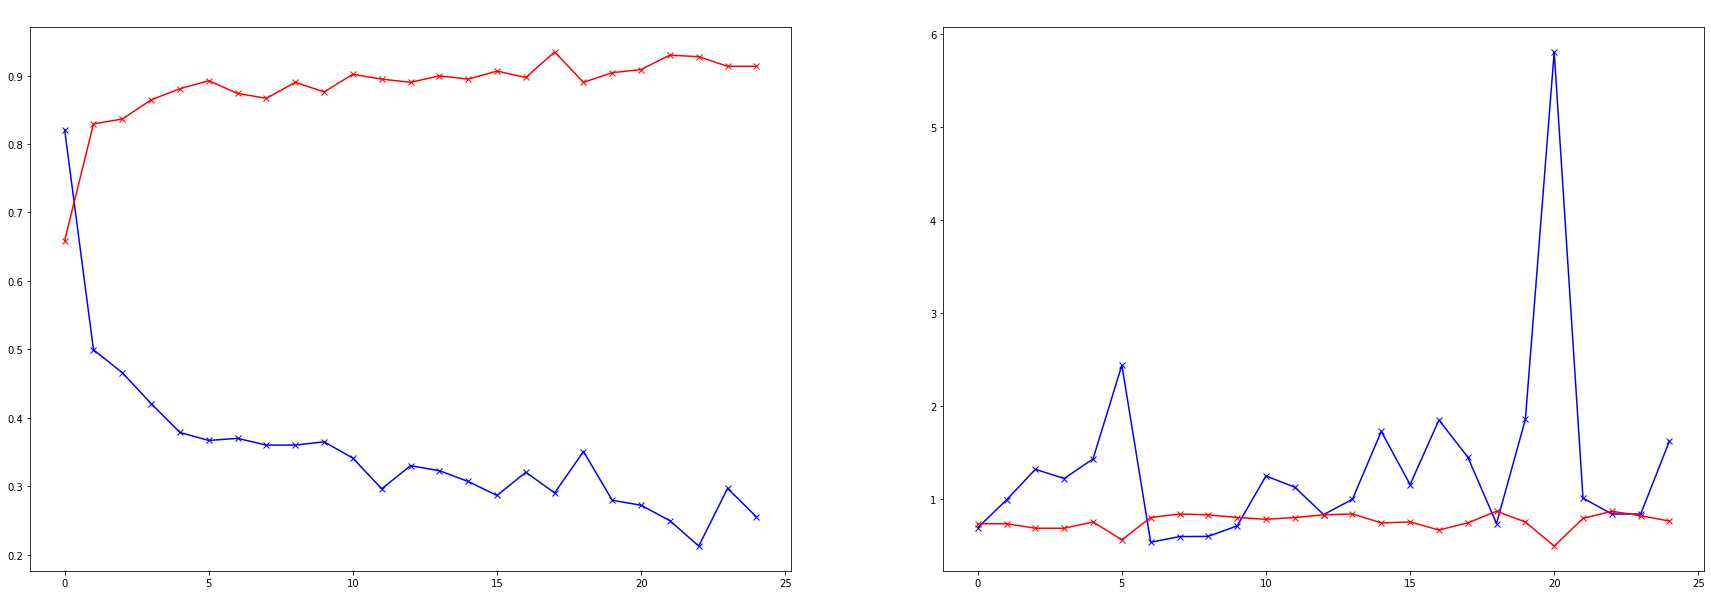

In [88]:


fig, ax = plt.subplots(1,2,figsize=(30,10))

ax = ax.flatten()

ax[0].plot(history.history['loss'],'bx-')
ax[0].plot(history.history['accuracy'],'rx-')
ax[0].set_title('training',fontsize=20,color='white')

ax[1].plot(history.history['val_loss'],'bx-')
ax[1].plot(history.history['val_accuracy'],'rx-')
ax[1].set_title('validation',fontsize=20,color='white')
plt.show()

# BUEN TRABAJO! PUEDES ESTAR ORGULLOSO DE TUS NUEVAS HABILIDADES ADQUIRIDAS
